<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

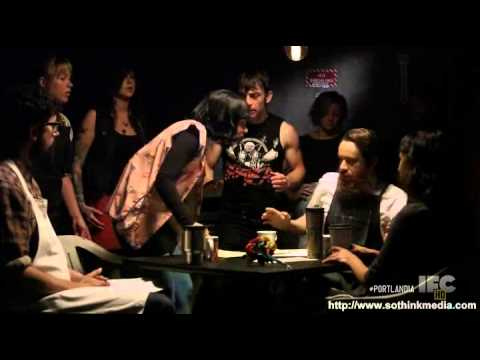

In [47]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [48]:
%pwd

'C:\\Users\\rowai\\Dropbox\\Data Science\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [49]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [50]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [51]:
shops.shape

(7616, 3)

In [52]:
shops['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

**Approximately 80% of the coffee shops in this dataset are "good"; 4 or 5 star rating.**

In [53]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [54]:
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [55]:
shops['tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: tokens, dtype: object

In [56]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')



In [57]:
wc = count(shops['tokens'])

In [58]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
75,the,6520,27779,1.0,0.034334,0.034334,0.856092
69,and,6804,25748,2.0,0.031824,0.066157,0.893382
3,,7616,22606,3.0,0.027940,0.094097,1.000000
23,a,6181,22085,4.0,0.027296,0.121394,0.811581
72,I,5469,19780,5.0,0.024447,0.145841,0.718093


In [59]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [60]:
shops.tokens.head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

In [61]:
wc = count(shops['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,,7616,22606,1.0,0.053592,0.053592,1.000000
17,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
98,place,3029,4264,3.0,0.010109,0.082803,0.397715
89,great,2438,3250,4.0,0.007705,0.090508,0.320116
266,it's,2061,3117,5.0,0.007389,0.097897,0.270614
184,like,2034,2902,6.0,0.006880,0.104777,0.267069
196,good,2084,2779,7.0,0.006588,0.111365,0.273634
11,1,1998,2035,8.0,0.004824,0.116190,0.262342
29,check-in,1957,1961,9.0,0.004649,0.120839,0.256959
31,love,1434,1806,10.0,0.004281,0.125120,0.188288


In [62]:
STOP_WORDS = nlp.Defaults.stop_words.union(['food','coffee', "i've", "i'm", '1', " ", 'it', "it's", 'it.', 'the', 'place', '-', 'coffee.', 'this',])

In [63]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [64]:
wc = count(shops['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
87,great,2438,3250,1.0,0.008618,0.008618,0.320116
180,like,2034,2902,2.0,0.007695,0.016313,0.267069
192,good,2084,2779,3.0,0.007369,0.023681,0.273634
26,check-in,1957,1961,4.0,0.005200,0.028881,0.256959
28,love,1434,1806,5.0,0.004789,0.033670,0.188288
793,little,1230,1479,6.0,0.003922,0.037592,0.161502
322,don't,1133,1395,7.0,0.003699,0.041291,0.148766
177,nice,1188,1368,8.0,0.003627,0.044918,0.155987
610,time,1099,1345,9.0,0.003566,0.048484,0.144301
19,pretty,1066,1339,10.0,0.003550,0.052035,0.139968


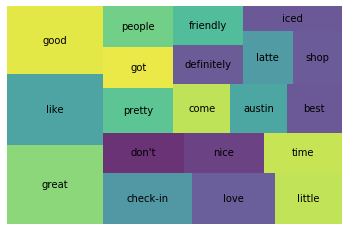

In [65]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


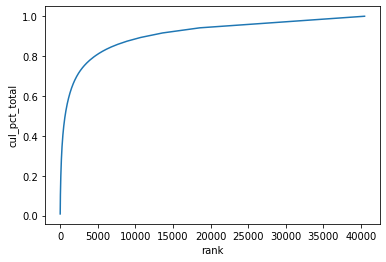

In [66]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

It appears that the first 10000 words account for nearly 90% of variation in rating.

***Applying Lemmatization to see if that improves language processing***

In [70]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

In [73]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
shops['lemmas'].head()

0    [11/25/2016, check, Love, love, love, atmosphe...
1    [12/2/2016, list, Date, Night, Austin, Ambianc...
2    [11/30/2016, check, list, Brunch, Spots, love,...
3    [11/25/2016, cool, decor, good, drink, nice, s...
4    [12/3/2016, check, locate, Northcross, mall, s...
Name: lemmas, dtype: object

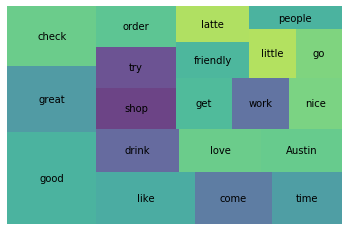

In [83]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 500]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [84]:
wc['appears_in_pct'].describe()

count    18435.000000
mean         0.002158
std          0.011601
min          0.000131
25%          0.000131
50%          0.000263
75%          0.000788
max          0.469538
Name: appears_in_pct, dtype: float64

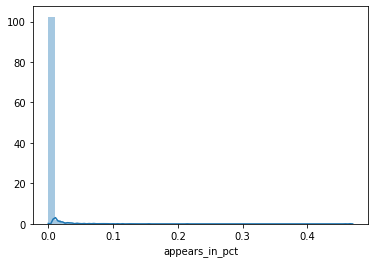

In [85]:
sns.distplot(wc['appears_in_pct']);

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

